In [2]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-4-used-car-sales-datasets-combined/output.csv


# Data load

In [20]:
car_data = pd.read_csv('/kaggle/input/top-4-used-car-sales-datasets-combined/output.csv')

# Null value handle

In [21]:
car_data.dropna(axis=0,subset=['engine','owner','mileage','power','seats'],inplace=True)

In [22]:
car_data.drop(['type'],axis=1,inplace=True)

In [23]:
car_data.head()

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats
2805,maruti,wagon,manual,14.0,cng,998.0,72000.0,1.0,175000.0,mumbai,36.974,58.16,5.0
2806,hyundai,creta,manual,9.0,diesel,1582.0,41000.0,1.0,1250000.0,pune,19.670,126.20,5.0
2807,honda,jazz,manual,13.0,petrol,1199.0,46000.0,1.0,450000.0,chennai,18.200,88.70,5.0
2808,maruti,ertiga,manual,12.0,diesel,1248.0,87000.0,1.0,600000.0,chennai,20.770,88.76,7.0
2809,audi,a4,automatic,11.0,diesel,1968.0,40670.0,2.0,1774000.0,coimbatore,15.200,140.80,5.0


In [24]:
car_data.describe()

,age,engine,km,owner,price,mileage,power,seats
count,5854.000000,5854.000000,5.854000e+03,5854.000000,5.854000e+03,5854.000000,5854.000000,5854.000000
mean,10.531944,1619.576529,5.843926e+04,1.195422,9.339551e+05,18.402648,112.538242,5.286642
std,3.162643,591.888167,9.227827e+04,0.445652,1.023654e+06,4.662234,52.317053,0.800330
min,5.000000,72.000000,1.710000e+02,1.000000,4.400000e+04,0.000000,34.200000,2.000000
25%,8.000000,1198.000000,3.371825e+04,1.000000,3.500000e+05,15.300000,75.000000,5.000000
50%,10.000000,1495.000000,5.290500e+04,1.000000,5.700000e+05,18.460000,94.000000,5.000000
75%,12.000000,1984.000000,7.246125e+04,1.000000,1.000000e+06,21.100000,138.100000,5.000000
max,26.000000,5998.000000,6.500000e+06,4.000000,7.066000e+06,46.620600,552.000000,10.000000


# Exploratory Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

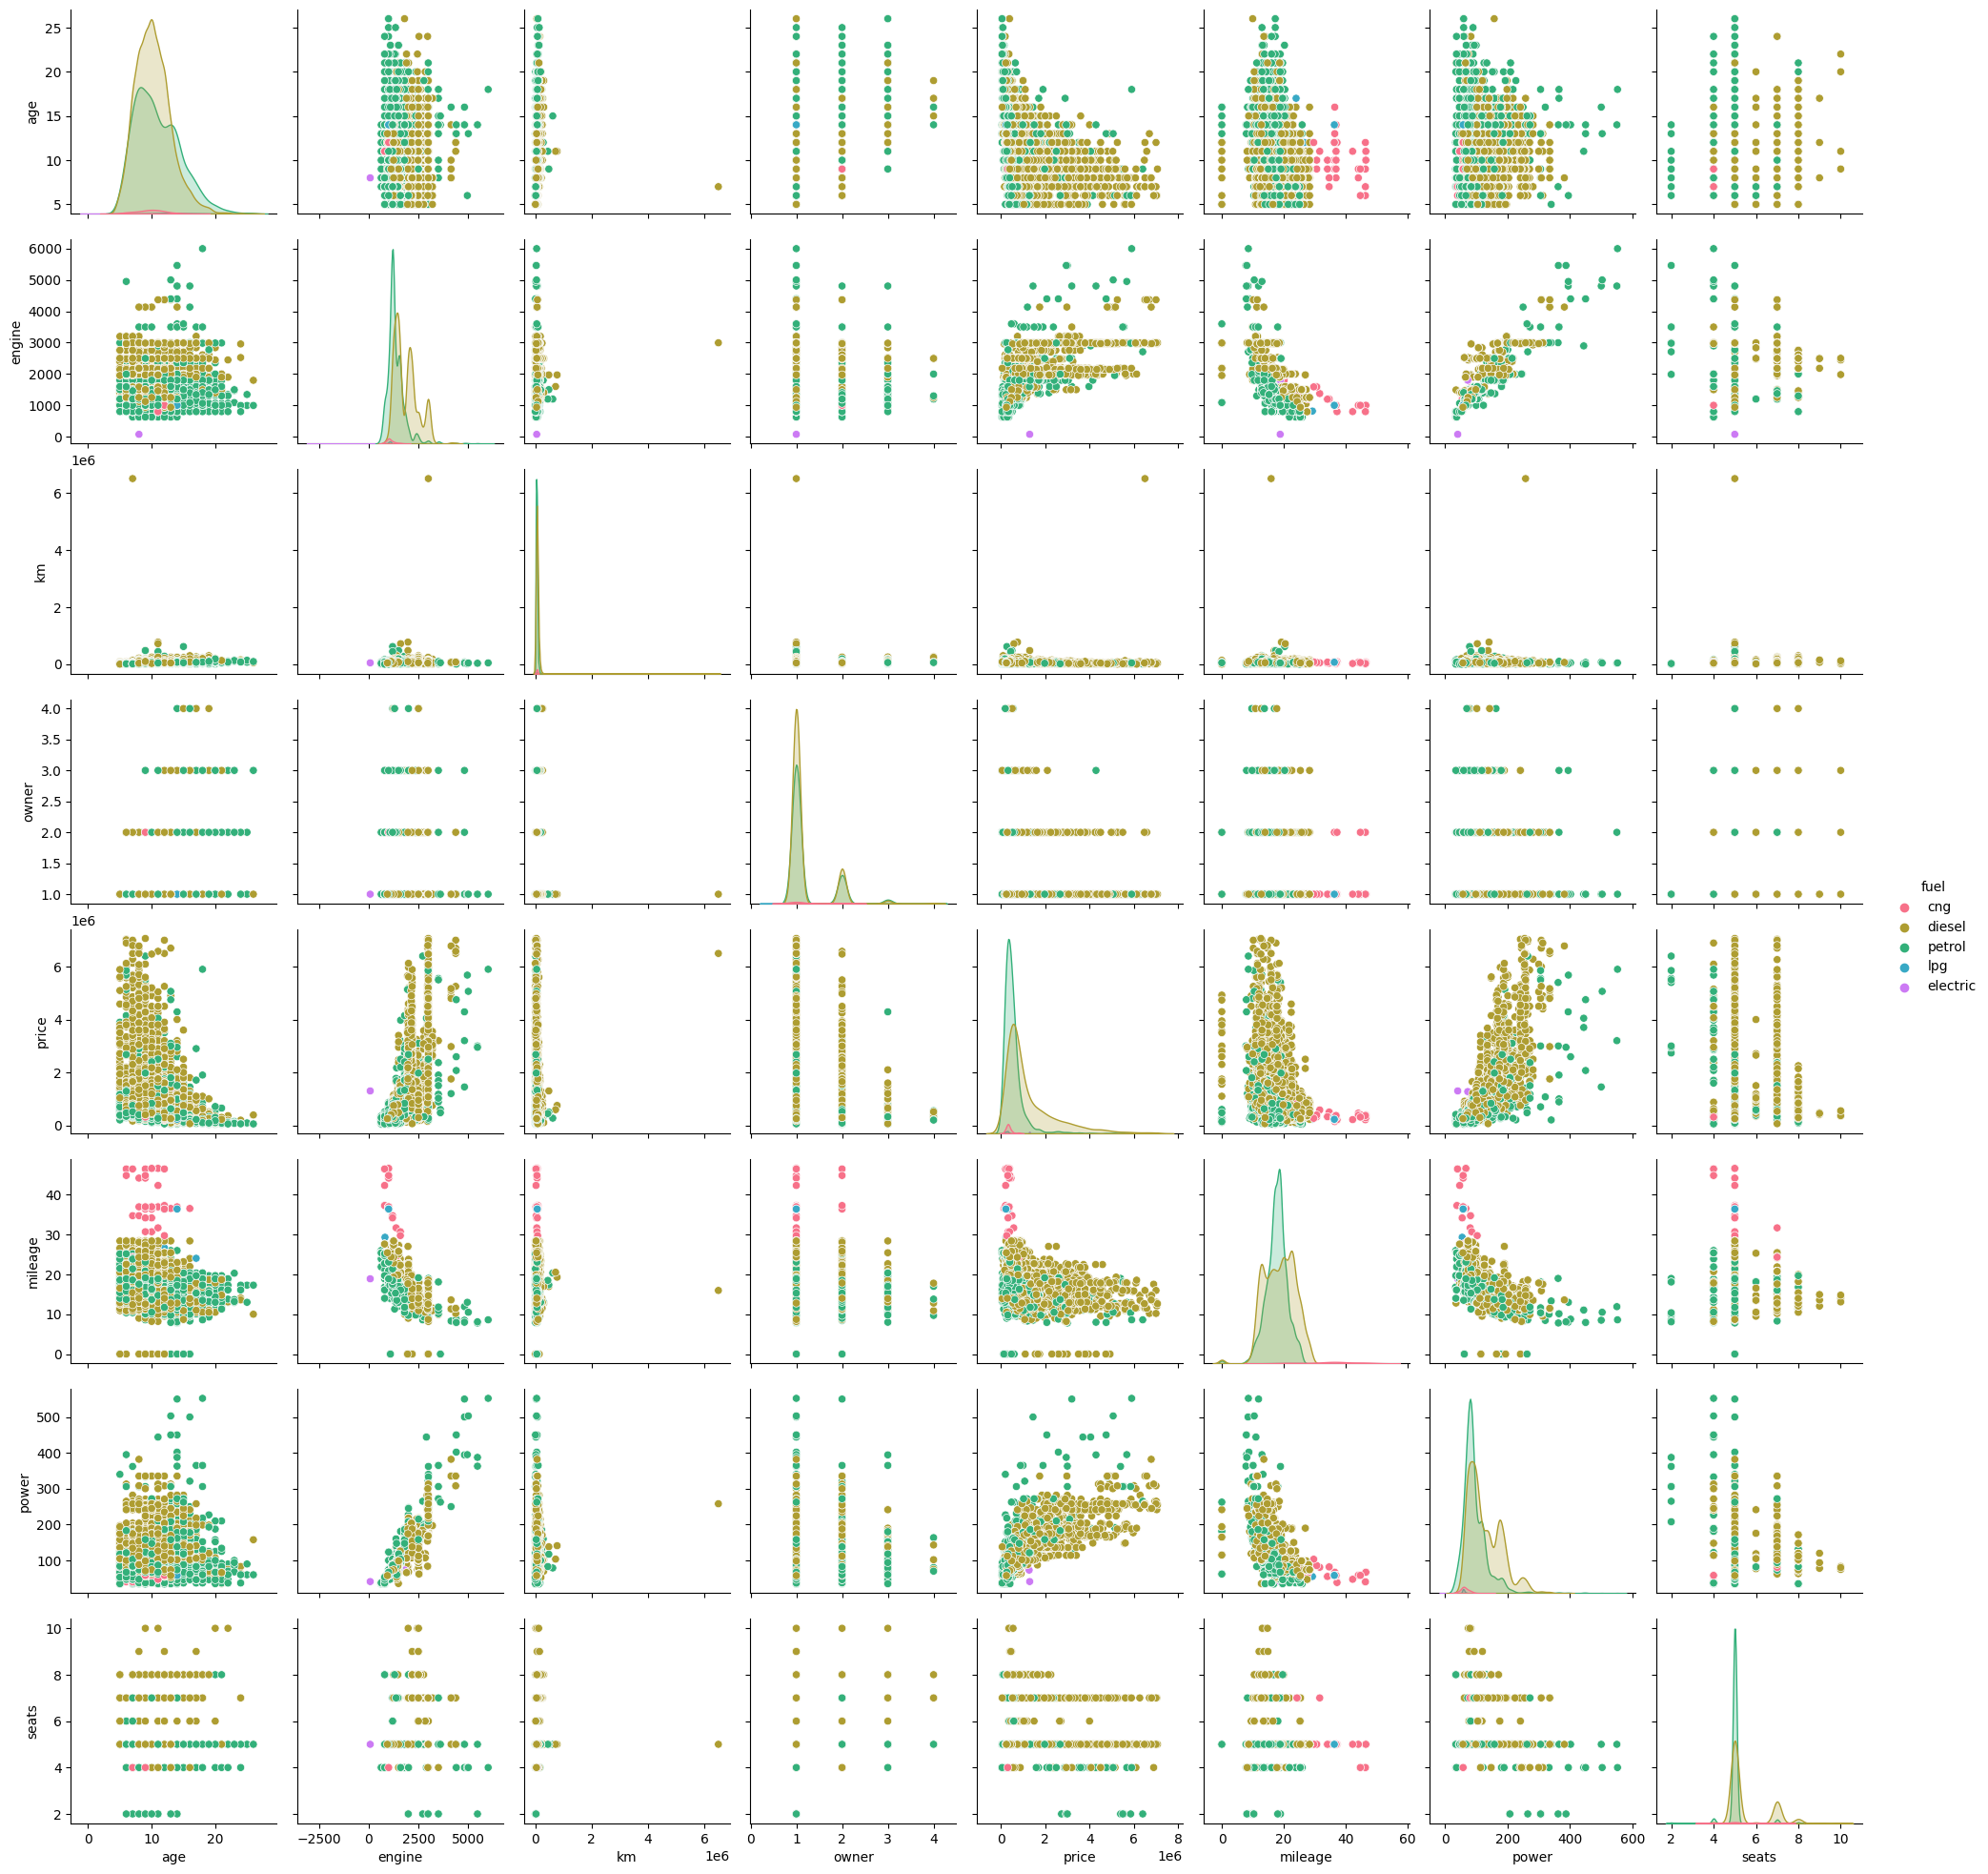

In [25]:
sns.pairplot(car_data,hue='fuel',palette='husl')
plt.show()

In [26]:
px.histogram(car_data,x='fuel',color='fuel',title='Fuel Type Distribution')

In [27]:
px.pie(car_data,names='owner',title='Owner Type Distribution')

In [28]:
px.pie(car_data,names='transmission',title='Transmission Type Distribution')

In [29]:
px.histogram(car_data,x='seats',title='Seats Distribution',color='seats')

In [31]:
brands = car_data['brand'].value_counts().reset_index()

In [32]:
brands

,brand,count
0,maruti,1175
1,hyundai,1058
2,honda,600
3,toyota,395
4,volkswagen,314
5,mercedes-benz,310
6,ford,294
7,mahindra,269
8,bmw,259
9,audi,234


In [33]:
px.bar(brands,x='brand',y='count',title='Brand Distribution',color='brand')

In [34]:
px.histogram(car_data,x='age',title='Age Distribution',color='age')

In [35]:
px.histogram(car_data,x='location',title='Location Distribution',color='location')

In [36]:
px.scatter(car_data,x='age',y='price',title='Price vs Age',color='age')

In [37]:
px.scatter(car_data,x='mileage',y='price',title='Price vs Mileage',color='mileage')

In [38]:
px.scatter(car_data,x='power',y='price',title='Price vs Power',color='power')

In [39]:
px.scatter(car_data,x='engine',y='price',title='Price vs Engine',color='engine')

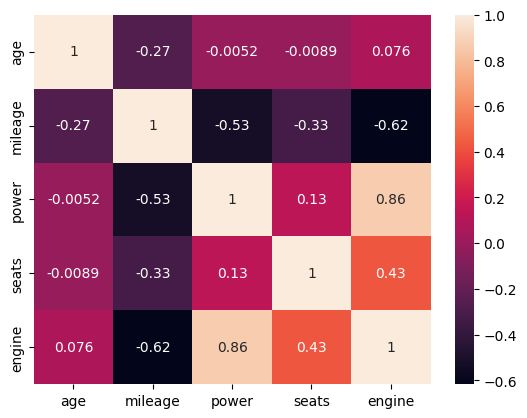

In [40]:
sns.heatmap(car_data[['age','mileage','power','seats', 'engine']].corr(),annot=True)
plt.show()

# Model Prediction

In [43]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le =  LabelEncoder()

In [47]:
car_data['brand'] = le.fit_transform(car_data['brand'])
car_data['fuel'] = le.fit_transform(car_data['fuel'])
car_data['transmission'] = le.fit_transform(car_data['transmission'])
car_data['location'] = le.fit_transform(car_data['location'])

In [48]:
X = car_data.drop(['price','model'],axis=1)
Y = car_data['price']

In [49]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
RF = RandomForestRegressor()
RF.fit(train_x,train_y)
yhat = RF.predict(test_x)

In [52]:
print('MSE:',mean_squared_error(test_y,yhat))
print('R2 Score:',r2_score(test_y,yhat))

MSE: 106014910142.15535
R2 Score: 0.9078632180179115


In [53]:
feature_importance = RF.feature_importances_

In [54]:
features = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})
features = features.sort_values(by='Importance',ascending=False)

In [55]:
px.bar(features,x='Feature',y='Importance',title='Feature Importance', color='Feature')